# Оглавление
1. [Введение](#introduction)
2. [Шаг 1. Откройте файл с данными и изучите общую информацию.](#paragraph1)
3. [Шаг 2. Предобработка данных](#paragraph2)
4. [Шаг 3. Посчитать и добавить данные](#paragraph5)
4. [Шаг 4. Исследовательский анализ данных](#paragraph3)
5. [Общий вывод](#paragraph4)


# Исследование объявлений о продаже квартир <a name="introduction"></a>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="paragraph1"></a>

In [436]:
import pandas as pd
from numpy import random
from IPython.display import display


In [437]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.options.display.max_columns = None
display(data)
data.describe().T

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Требуется предобработка, так как есть пропуски, тип некоторых переменных стоит поменять, перемешиваются типы данных в одном столбце. Столбцы floors_total, first_day_exposition, is_apartment требуют замены данных.

### Шаг 2. Предобработка данных <a name="paragraph2"></a>

Проверим данные на наличие пропусков во всех столбцах по порядку.

In [438]:
for i in data.columns:
    if data[i].isnull().sum()!=0:
        print(i, data[i].isnull().sum())

ceiling_height 9195
floors_total 86
living_area 1903
is_apartment 20924
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


Глядя на количество пропусков, сразу становится понятно, что надо сделать с некоторыми столбцами. Заменить пропуски на среднее в ceiling_height, floors_total,living_area, kitchen_area, так как они являются количественными переменными. Однако стоит соотносить со средним количеством комнат и известной площадью кухни. 
В колонке is_apartment стоит заменить пропуски на False. Строки с пропущенным населенным пунктом стоит отбросить вообще, так как это ключевой параметр. Можно попробовать восстановить название населенного пункта по известным расстояниям от аэропорта и центра, но это невозможно, так как по 2м точкам невозможно определить локацию.

In [439]:
data.dropna(subset = ['locality_name'], inplace= True)
print(data['locality_name'].isnull().sum())

0


Мы избавились от квртир с неизвестным адресом, далее рассмотрим высоту потолка. Надо будет заменить пропуски на медиану или среднее.

Средняя высота потолков 2.7712870945479646 м
Медианная высота потолков 2.65 м


Text(0, 0.5, 'Количество объявлений, шт')

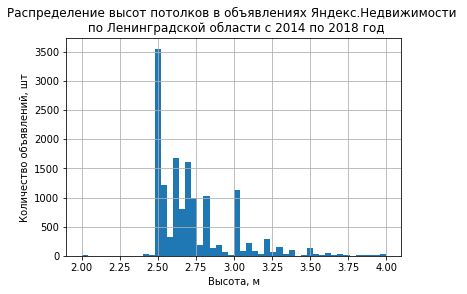

In [440]:
print('Средняя высота потолков {} м'.format(data['ceiling_height'].mean()))
print('Медианная высота потолков {} м'.format(data['ceiling_height'].median()))
ax = data['ceiling_height'].hist(range = (2,4), bins=50)
ax.set_title('Распределение высот потолков в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Высота, м")
ax.set_ylabel("Количество объявлений, шт")

Распределение не очень сильно смещено, можно заменить как на среднее, так и на медану. Чтобы не создавать ложный максимум, заменим на случайные числа. Напишем функцию, потом применим ее для других пропусков.

0


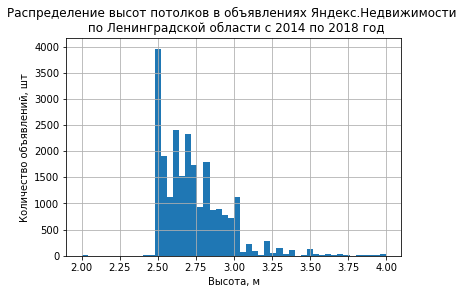

In [441]:
ceiling_r=[]
def rand_fillna(min_v,max_v,column,data):
    for i in range(0,data[column].isnull().sum()):
        ceiling_r.append(random.uniform(min_v,max_v))
    data.loc[data[column].isna(), column] = ceiling_r
    return data
rand_fillna(2.5,3, 'ceiling_height', data)
ax = data['ceiling_height'].hist(range = (2,4), bins=50)
ax.set_title('Распределение высот потолков в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Высота, м")
ax.set_ylabel("Количество объявлений, шт")
print(data['ceiling_height'].isnull().sum())

Отлично, нам удалось распределить пропущенные значения в высоте потолка. Мы не знаем этажность здания, но знаем на каком этаже располагается квартира. Чтобы не было противоречий, выделим самые популярные по этажности здания и будем заменять пропущенную этажность в соответствии с этажом в объявлении.

In [442]:
data['floors_total'].value_counts().head(10)

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
Name: floors_total, dtype: int64

Соответственно мы будем заполнять пропуски в этажности выбирая из 4, 5, 6, 9, 10, 12, 16 и 25-этажных зданий.

In [443]:
data.loc[data['floors_total'].isna(), 'floor'].max()

24

Самый высокий этаж в выборке без указания дома - 24.

In [444]:
ind_fl = data.loc[data['floors_total'].isna(), 'floor'].index 
for i in range(0, len(ind_fl)):
    if data.loc[ind_fl[i],'floor'] <= 4:
        data.loc[ind_fl[i],'floors_total']=4
    elif data.loc[ind_fl[i],'floor'] ==5:
        data.loc[ind_fl[i],'floors_total']=5
    elif data.loc[ind_fl[i],'floor'] ==6:
        data.loc[ind_fl[i],'floors_total']=6
    elif 6<data.loc[ind_fl[i],'floor'] <=9:
         data.loc[ind_fl[i],'floors_total']=9
    elif data.loc[ind_fl[i],'floor'] ==10:
        data.loc[ind_fl[i],'floors_total']=10
    elif 10<data.loc[ind_fl[i],'floor'] <=12:
        data.loc[ind_fl[i],'floors_total']=12
    elif 12<data.loc[ind_fl[i],'floor'] <=16:
        data.loc[ind_fl[i],'floors_total']=16
    elif 16<data.loc[ind_fl[i],'floor'] <=25:
        data.loc[ind_fl[i],'floors_total']=25
print(data['floors_total'].isnull().sum())

0


Так мы всех "расселили" в дома, пропущенных не осталось. Далее замена пропусков в столбце 'living_area'. Придется ее приравнивать к средней для данного количества комнат площади. Для этого сначала посмотрим на данные по комнатам.

In [445]:
print(data['rooms'].value_counts())

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


Я думаю, что мы в праве отрезать хвост, начиная с 14 комнатных квартир и ниже. Еще надо убедиться, что все квартиры с 0 комнатами являются студиями. Столбец floors_total сделать типом int

In [446]:
data = data[data['rooms'] <= 10]
print(data['rooms'].value_counts())
data.loc[data['rooms']==0, 'studio'] = True
data['floors_total'] = data['floors_total'].astype('int')

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
Name: rooms, dtype: int64


Теперь в соответствии с количеством комнат заменим пропуски в living_area и kitchen_area.

In [447]:
print(data['living_area'].describe(),
      data['kitchen_area'].describe())

count    21744.000000
mean        34.372670
std         21.590299
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64 count    21373.000000
mean        10.555372
std          5.827603
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


Среднее и медиана для living_area 34 и 30 соотвественно, различие первого квартиля и третьего от медианы - одинковое, распределение не смещено, можно использовать среднее значение, аналогично и для kitchen_area.

In [448]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.mean()))
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.mean()))
print(data.loc[data['rooms'] ==0, 'kitchen_area'].value_counts())
print(data.loc[data['rooms'] ==0, 'kitchen_area'])

Series([], Name: kitchen_area, dtype: int64)
144     NaN
349     NaN
440     NaN
508     NaN
608     NaN
         ..
23210   NaN
23442   NaN
23554   NaN
23592   NaN
23637   NaN
Name: kitchen_area, Length: 197, dtype: float64


197 квартир-студий не имеют данных о площади кухни. Это логично - невозможно четко определить площадь кухни в квартире-студии. Заменим этот метраж нулем. Заменим пропуски в указанном количестве балконов нулями, вряд ли тут можно по какой-то причине пропустить данные, тип поставим int. Аналогично стоит заменить пропуски в столбце is_apartment на False

In [449]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = 0
data.loc[data['balcony'].isna(), 'balcony'] = 0
data['balcony'] = data['balcony'].astype('int')
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False


Заменим тип данных на дату в столбце first_day_exposition и посмотрим на типы данных, они должны соответствовать.

In [450]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info(memory_usage='deep')
for i in data.columns:
    print(i, data[i].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23642 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23642 non-null int64
last_price              23642 non-null float64
total_area              23642 non-null float64
first_day_exposition    23642 non-null datetime64[ns]
rooms                   23642 non-null int64
ceiling_height          23642 non-null float64
floors_total            23642 non-null int64
living_area             23642 non-null float64
floor                   23642 non-null int64
is_apartment            23642 non-null bool
studio                  23642 non-null bool
open_plan               23642 non-null bool
kitchen_area            23642 non-null float64
balcony                 23642 non-null int64
locality_name           23642 non-null object
airports_nearest        18108 non-null float64
cityCenters_nearest     18131 non-null float64
parks_around3000        18132 non-null float64
parks_nearest           8060 non-null float64
ponds_around

Оптимизируем типы данных, если сравнить занимаемую память до и после преобразования типов данных, то разница составить около 32%.

In [451]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)
data_int = data.select_dtypes(include=['int'])
converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')
data_float = data.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')
for columns in converted_int:
    print(columns)
    data[columns]=converted_int[columns]
for columns in converted_float:
    print(columns)
    data[columns]=converted_float[columns]
data.info(memory_usage='deep')
for dtype in ['float','int','object']:
    selected_dtype = data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

total_images
rooms
floors_total
floor
balcony
last_price
total_area
ceiling_height
living_area
kitchen_area
airports_nearest
cityCenters_nearest
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
days_exposition
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23642 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23642 non-null uint8
last_price              23642 non-null float32
total_area              23642 non-null float32
first_day_exposition    23642 non-null datetime64[ns]
rooms                   23642 non-null uint8
ceiling_height          23642 non-null float32
floors_total            23642 non-null uint8
living_area             23642 non-null float32
floor                   23642 non-null uint8
is_apartment            23642 non-null bool
studio                  23642 non-null bool
open_plan               23642 non-null bool
kitchen_area            23642 non-null float32
balcony                 23642 non-null uint8
locality_name         

В таком виде можно проводить дальнейший анализ данных.

### Шаг 3. Посчитайте и добавьте в таблицу <a name="paragraph5"></a>

Добавим в таблицу цену квадратного метра, сложим жилую площадь и площадь кухни и поделим на last_price на эту сумму. Добавим день недели, месяц и год размещения публикации

In [452]:
data['meter_price']=data['last_price']/data['total_area']
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

Добавим категорию этажа квартиры - первый, последний или другой.

In [453]:
result = []
def floor_namber(floor, floors_total):
    if floor == 1:
        result = 'первый'
    elif floor == floors_total:
        result = 'последний'
    elif floors_total != floors_total / 1:
        result = np.nan
    else:
        result = 'другой'
    return result
data['floor_p'] = data.apply(lambda row: floor_namber(row['floor'], row['floors_total']), axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23642 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23642 non-null uint8
last_price              23642 non-null float32
total_area              23642 non-null float32
first_day_exposition    23642 non-null datetime64[ns]
rooms                   23642 non-null uint8
ceiling_height          23642 non-null float32
floors_total            23642 non-null uint8
living_area             23642 non-null float32
floor                   23642 non-null uint8
is_apartment            23642 non-null bool
studio                  23642 non-null bool
open_plan               23642 non-null bool
kitchen_area            23642 non-null float32
balcony                 23642 non-null uint8
locality_name           23642 non-null object
airports_nearest        18108 non-null float32
cityCenters_nearest     18131 non-null float32
parks_around3000        18132 non-null float32
parks_nearest           8060 non-null float32
ponds_around

Посчитаем соотношение жилой и общей площади и отношение площади кухни к общей.

In [454]:
data['living_to_total']=data['living_area']/data['total_area']
data['kitchen_to_total']=data['kitchen_area']/data['total_area']
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,month,year,day,floor_p,living_to_total,kitchen_to_total
0,20,13000000.0,108.000000,2019-03-07,3,2.700000,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,2019,3,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.672611,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062,12,2018,1,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.589095,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938,8,2015,3,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.606879,14,47.373497,9,False,False,False,11.306627,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750,7,2015,4,другой,0.297947,0.071111
4,2,10000000.0,100.000000,2018-06-19,2,3.030000,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,6,2018,1,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.809998,2017-03-21,3,3.700000,5,73.300003,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.843750,3,2017,1,другой,0.547792,0.103356
23695,14,3100000.0,59.000000,2018-01-15,3,2.717872,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.371094,1,2018,0,другой,0.644068,0.144068
23696,18,2500000.0,56.700001,2018-02-11,2,2.715347,3,29.700001,1,False,False,False,9.975604,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710938,2,2018,6,первый,0.523810,0.175937
23697,13,11475000.0,76.750000,2017-03-28,2,3.000000,17,31.732153,12,False,False,False,23.299999,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.406250,3,2017,1,другой,0.413448,0.303583


##### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a name="paragraph3"></a>

Далее изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    23642.000000
mean        60.217484
std         34.895992
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        631.200012
Name: total_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

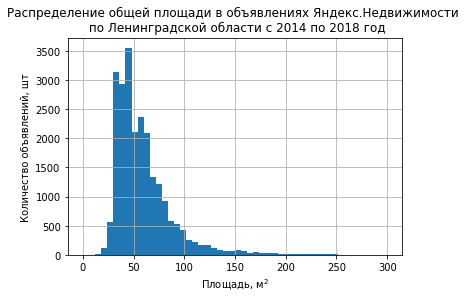

In [455]:
print(data['total_area'].describe())
ax = data['total_area'].hist(bins=50, range=(0,300))
ax.set_title('Распределение общей площади в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Площадь, м$^2$")
ax.set_ylabel("Количество объявлений, шт")

Свыше 200 кв.м очень мало квартир, а точнее 221, такой рынок недвижимости достаточно специфичен, поэтому для выявления общих закономерностей стоит работать с квартирами менее 200 кв.м

221


Text(0, 0.5, 'Количество объявлений, шт')

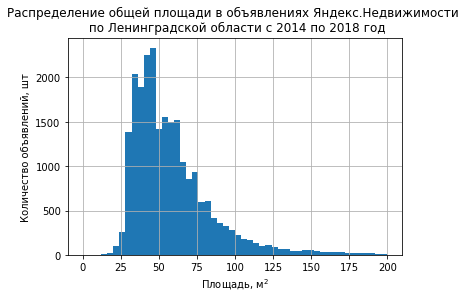

In [456]:
print(len(data.query('total_area >200')))
data = data.query('total_area <200')
ax = data['total_area'].hist(bins=50, range=(0,200))
ax.set_title('Распределение общей площади в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Площадь, м$^2$")
ax.set_ylabel("Количество объявлений, шт")

Взглянем таким же образом на цены.

count        23417.0
mean       6019426.0
std        6227315.5
min          12190.0
25%        3400000.0
50%        4600000.0
75%        6700000.0
max      330000000.0
Name: last_price, dtype: float64
980


Text(0, 0.5, 'Количество объявлений, шт')

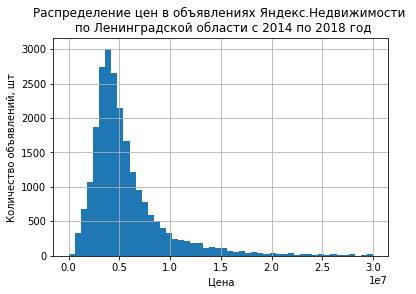

In [457]:
print(data['last_price'].describe())
ax  =data['last_price'].hist(bins=50, range=(0,30000000))
print(len(data.query('last_price >15000000')))
ax.set_title('Распределение цен в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Цена")
ax.set_ylabel("Количество объявлений, шт")

Отбросим 980 объявлений, где цена выше 15 000 000.

Text(0, 0.5, 'Количество объявлений, шт')

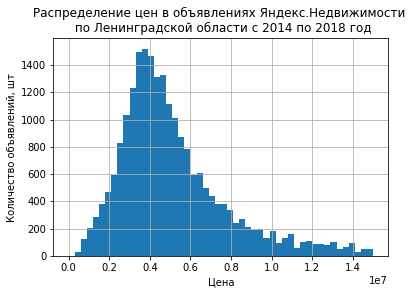

In [480]:
data = data.query('last_price <15000000')
ax =data['last_price'].hist(bins=50, range=(0,15000000))
ax.set_title('Распределение цен в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Цена")
ax.set_ylabel("Количество объявлений, шт")

count    22396.000000
mean         1.973299
std          0.944119
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

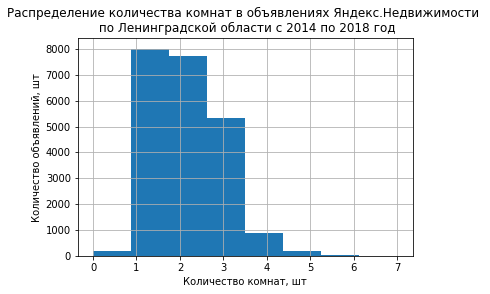

In [459]:
 print(data['rooms'].describe())
ax =data['rooms'].hist(bins=8, range=(0,7))
ax.set_title('Распределение количества комнат в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Количество комнат, шт")
ax.set_ylabel("Количество объявлений, шт")

В результате получилось, что максимальное количество комнат 7, а не 10, как мы остекли ранее.

count    22396.000000
mean         2.743271
std          0.776804
min          1.000000
25%          2.550000
50%          2.700000
75%          2.812907
max         32.000000
Name: ceiling_height, dtype: float64
211


Text(0, 0.5, 'Количество объявлений, шт')

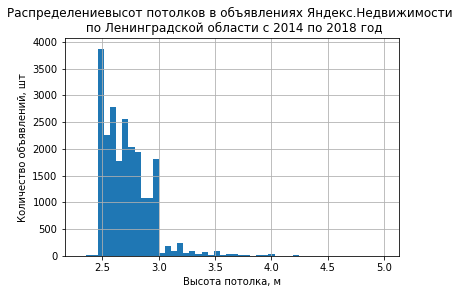

In [460]:
print(data['ceiling_height'].describe())
ax =data['ceiling_height'].hist(bins=50, range=(2.3,5))
print(len(data.query('ceiling_height <2.4 | ceiling_height>3.5')))
data = data.query('2.4 < ceiling_height < 3.5')
ax.set_title('Распределениевысот потолков в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Высота потолка, м")
ax.set_ylabel("Количество объявлений, шт")

Оставим высоты потолков от 2.4 метров(минимальная норма в России) до 3.5, так придется выбросит 211 объявлений. Видно как значение высоты потолка заключено между цифрами 2.4 и 3 м - высоты потолка в панельных домах основных серий. Далее изучим время продажи.

count    19322.000000
mean       175.606979
std        214.679947
min          1.000000
25%         44.000000
50%         92.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

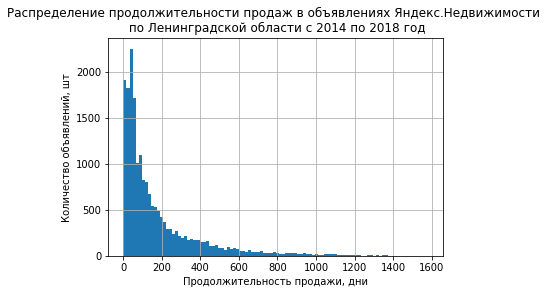

In [461]:
print(data['days_exposition'].describe())
ax = data['days_exposition'].hist(bins=100, range=(1,1580))
ax.set_title('Распределение продолжительности продаж в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_xlabel("Продолжительность продажи, дни")
ax.set_ylabel("Количество объявлений, шт")

Среднее время продажи - 176 дней, медианное - 92. Большой хвост долгих продаж повышает среднее время продажи. Но даже так можно говорить, что свыше 75% размещенных квартир были проданы в течение 7-8 месяцев. То есть продажа, которая длится свыше года это долго, сыше двух лет - очень долго, но встречается и такое. Наибольшее количество сделок состоялось в течение 100 дней после размещения объявления. Тут возникает вопрос "Насколько соответствие цены квартиры с ее параметрами влияет на время продажи?". Ответим далее на этот вопрос.

Коэффициент корреляции: 0.6231603486983794


Text(0.5, 0, 'Цена квадратного метра, $ед/м^2$')

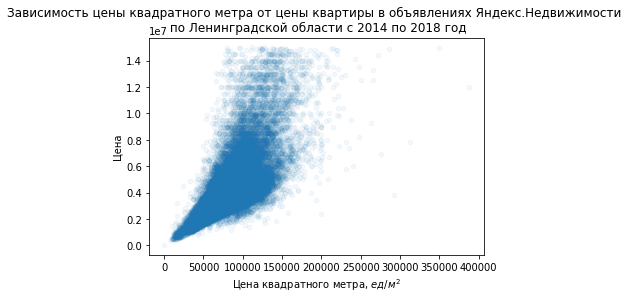

In [462]:
ax = data.plot(x='meter_price', y='last_price', kind='scatter', alpha=0.05, title='Зависимость цены квадратного метра от цены квартиры в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год') 
print('Коэффициент корреляции:',data['meter_price'].corr(data['last_price']))
ax.set_ylabel('Цена') 
ax.set_xlabel("Цена квадратного метра, $ед/м^2$")

Коэффициент корреляции: 0.48406425319882057


Text(0.5, 0, 'Количество комнат')

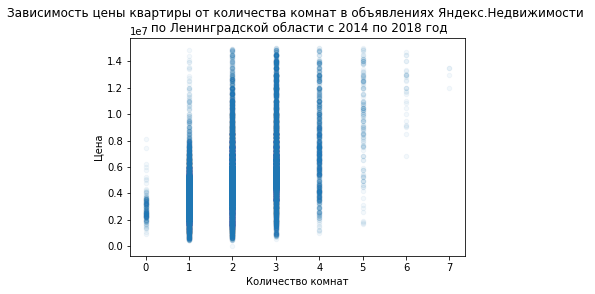

In [463]:
ax = data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05, title = 'Зависимость цены квартиры от количества комнат в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год') 
print('Коэффициент корреляции:',data['rooms'].corr(data['last_price']))
ax.set_ylabel('Цена') 
ax.set_xlabel("Количество комнат")

Коэффициент корреляции между ценой и количеством конмат не так высок, но зависимость очевидна - 6 или 7-комнатная квартира, не будет стоит как "однушка" или студия. Но трехкомнатные квартиры тоже могут иметь высокую цену, скорее всего это зависит от расположения.

Коэффициент корреляции: 0.743120158779111


Text(0.5, 0, 'Общая площадь, м$^2$')

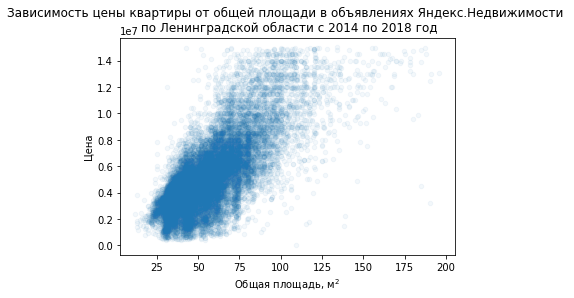

In [464]:
ax = data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05,title ='Зависимость цены квартиры от общей площади в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год') 
print('Коэффициент корреляции:',data['total_area'].corr(data['last_price']))
ax.set_ylabel('Цена') 
ax.set_xlabel("Общая площадь, м$^2$")

Коэффициент корреляции между ценой и метражом составляет 0.74, это много. Явная зависимость между метражом и ценой.

Коэффициент корреляции: 0.3130285900058806


Text(0.5, 0, 'Высота потолка, м')

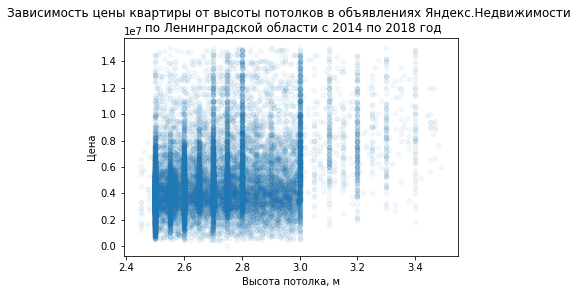

In [465]:
ax = data.plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.05, title = 'Зависимость цены квартиры от высоты потолков в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год') 
print('Коэффициент корреляции:',data['ceiling_height'].corr(data['last_price']))
ax.set_ylabel('Цена') 
ax.set_xlabel("Высота потолка, м")

Зависимость между высотой потолка и ценой проследить на первый взгляд невозможно. Потому что квартира в доме одной серии может стоить по-разному. Об этом нам говорит распределение цены по типовым высотам потолка в виде столбов по всему диапозону цен. Но распределения на высотах 2.8 и 3 захватывают дорогой сегмент рынка выраженнее остальных.

In [466]:
print('Коэффициент корреляции:',data['floor'].corr(data['last_price']))

Коэффициент корреляции: 0.12107817902195445


Говоря об этаже тоже ничего точно сказать нельзя. Потому что можно жить на 5 этаже в сталинке или в хрущевской пятиэтажке и это будут абсолютно разные квартиры.

Коэффициент корреляции: -0.34697913165395317


Text(0.5, 0, 'Расстояние до центра, км')

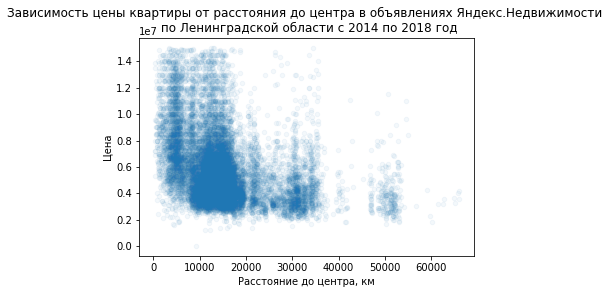

In [467]:
ax = data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05, title = 'Зависимость цены квартиры от расстояния до центра в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год') 
print('Коэффициент корреляции:',data['cityCenters_nearest'].corr(data['last_price']))
ax.set_ylabel('Цена') 
ax.set_xlabel("Расстояние до центра, км")

Обратная корреляция прослеживается между расстоянием до центра и ценой, но такие данные не репрезентативны, потому что тут много городов. 5 км от центра в Петербурге и в Пушкине будут по разному определять цены.

In [468]:

print('Коэффициент корреляции цены и года:',data['year'].corr(data['last_price']))
print('Коэффициент корреляции цены и дня:',data['day'].corr(data['last_price']))
print('Коэффициент корреляции цены и месяца:',data['month'].corr(data['last_price']))

Коэффициент корреляции цены и года: -0.012274214609149167
Коэффициент корреляции цены и дня: -0.012253785860780585
Коэффициент корреляции цены и месяца: 0.004922113248368029


У нас не сезонный рынок. Время продажи квартиры никак не влияет на ее цену.

Text(0.5, 0, 'Этаж')

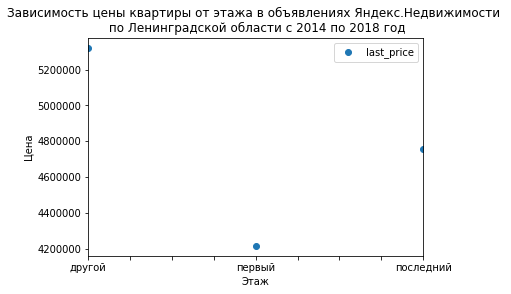

In [469]:
floor_data = data.pivot_table(index='floor_p', values='last_price', aggfunc='mean')
ax = floor_data.plot(style='o',title = 'Зависимость цены квартиры от этажа в объявлениях Яндекс.Недвижимости \n по Ленинградской области с 2014 по 2018 год')
ax.set_ylabel('Цена') 
ax.set_xlabel("Этаж")

На первом этаже, видимо, жить хуже, чем на последнем, потому что цена для первых этажей домов любого городаи и планировки все равно ниже. Для последних этажей цена будет выше. Выделим далее 10 пунктов с наибольшим количеством объявлений и посмотрим на среднюю цену квадратного метра в этих пунктах.

In [470]:
pop_data_count = data.pivot_table(index='locality_name', values='meter_price', aggfunc='count').sort_values(by='meter_price', ascending = False).head(10)
pop_data=data.query('locality_name in @pop_data_count.index')
print('Средняя цена квадратного метра')
pop_data = pop_data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = ['mean', 'count'])
pop_data.columns =['meter_price', 'count']
pop_data.sort_values(by='meter_price', ascending = False)

Средняя цена квадратного метра


,meter_price,count
locality_name,,
Санкт-Петербург,106984.507812,14263
Пушкин,101009.453125,339
деревня Кудрово,92473.546875,299
посёлок Парголово,90332.265625,326
посёлок Мурино,85725.242188,520
посёлок Шушары,78655.101562,439
Колпино,75352.476562,336
Гатчина,68811.375000,305
Всеволожск,67153.882812,393


Наибольшая цена в Петербурге, наименьшая в Выбоге, а между располагаются поселки и даже деревня. Стоит принять во внимание, что эти населенные пункты уже входят в городской округ Санкт-Петербурга и по сути являются его новыми районами, остюда и такая цена за метр. Изучим Санкт-Петербург отдельно.

                     last_price
cityCenters_nearest            
0.0                   8948750.0
1.0                   8876109.0
2.0                   8877908.0
3.0                   8187841.0
4.0                   8346483.5
5.0                   8427322.0
6.0                   7793486.0
7.0                   7186641.0
8.0                   7161651.0
9.0                   6069538.5
10.0                  5787948.0
11.0                  5643087.0
12.0                  5527691.5
13.0                  5825059.5
14.0                  5481316.0
15.0                  5509915.0
16.0                  5201978.0
17.0                  4995530.0
18.0                  4777300.0
19.0                  5037675.0
20.0                  5944080.5
21.0                  5493469.5
22.0                  5207859.5
23.0                  4689843.5
24.0                  3854429.5
25.0                  4088953.5
26.0                  3973012.5
27.0                  8300000.0
28.0                  5026428.5
29.0    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Расстояние до центра, км')

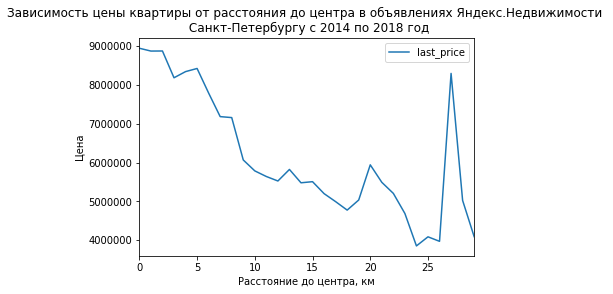

In [471]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data['cityCenters_nearest']= (spb_data['cityCenters_nearest']/1000).round()
print(spb_data.pivot_table(index='cityCenters_nearest', values = 'last_price', aggfunc='mean'))
ax = spb_data.pivot_table(index='cityCenters_nearest', values = 'last_price', aggfunc='mean').plot(title = 'Зависимость цены квартиры от расстояния до центра в объявлениях Яндекс.Недвижимости \n Санкт-Петербургу с 2014 по 2018 год')
ax.set_ylabel('Цена') 
ax.set_xlabel("Расстояние до центра, км")

Можно выделить сегмент квартир, расположенных в центре - квартиры ближе 5 км от центра. Интересен пик на 27 километре, похоже там уже начинаются поселки класса люкс. Рассмотрим, откуда этот пик, а далее приступим к анализу недвижимости в центре.

In [472]:
data.pivot_table(index='locality_name', values='last_price', aggfunc='mean').sort_values(by='last_price', ascending = False).head(10)


,last_price
locality_name,
посёлок Александровская,8725000.0
посёлок Репино,6889138.5
Санкт-Петербург,6018154.0
Сестрорецк,5966469.5
Пушкин,5550949.5
Зеленогорск,5032163.5
посёлок Лисий Нос,5027500.0
Павловск,4929710.5
деревня Заневка,4781500.0


In [473]:
data.query('locality_name == "посёлок Александровская"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,month,year,day,floor_p,living_to_total,kitchen_to_total
670,5,13700000.0,178.0,2017-08-08,4,2.770000,16,125.0,4,False,False,False,16.0,1,посёлок Александровская,13012.0,27584.0,0.0,NaN,1.0,914.0,112.0,76966.289062,8,2017,1,другой,0.702247,0.089888
20481,10,3750000.0,59.0,2016-06-09,2,2.601856,3,36.0,2,False,False,False,7.0,0,посёлок Александровская,12781.0,27352.0,0.0,NaN,1.0,509.0,45.0,63559.320312,6,2016,3,другой,0.610169,0.118644


Предположения оказались верными - в ближайших пригородах можно найти недвижимость сопоставимую по ценам с недвижимостьюв центре города. Приступим далее к сравнению недвижимости в центре с недвижимостью во всем остальном городе.

Text(0, 0.5, 'Количество объявлений, шт')

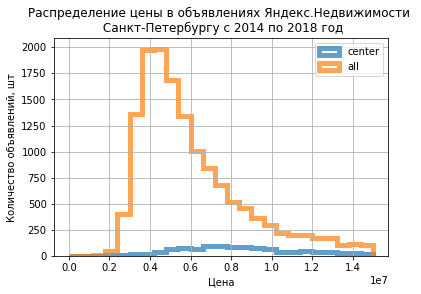

In [474]:
spb_data_center = spb_data.query("cityCenters_nearest < 5")
ax = spb_data_center.plot(kind='hist', y='last_price', histtype='step',range=(0, 15000000), bins=25, linewidth=5, alpha=0.7, label='center')
spb_data.plot(kind='hist', y='last_price', histtype='step', range=(0, 15000000), bins=25, linewidth=5, alpha=0.7, label='all', ax=ax, grid=True, legend=True, title = 'Распределение цены в объявлениях Яндекс.Недвижимости \n Санкт-Петербургу с 2014 по 2018 год') 
ax.set_xlabel("Цена")
ax.set_ylabel("Количество объявлений, шт")

Как и стоило ожидать - в центре небольшое количество квартир от общего количества, распределение которых по ценебудет смещено правее общего распределения.

Text(0, 0.5, 'Количество объявлений, шт')

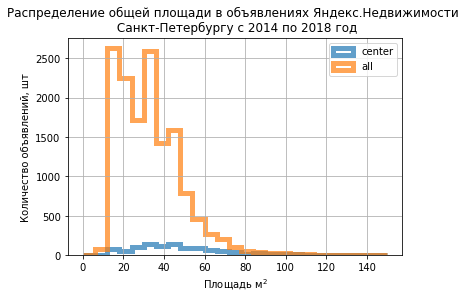

In [475]:
ax = spb_data_center.plot(kind='hist', y='living_area', histtype='step',range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='center')
spb_data.plot(kind='hist', y='living_area', histtype='step', range=(0, 150), bins=25, linewidth=5, alpha=0.7, label='all', ax=ax, grid=True, legend=True,title = 'Распределение общей площади в объявлениях Яндекс.Недвижимости \n Санкт-Петербургу с 2014 по 2018 год') 
ax.set_xlabel("Площадь м$^2$")
ax.set_ylabel("Количество объявлений, шт") 


По метражу квартиры в центре явно не выигрывают, видимо историческая и советская застройка не предполагают квартиры 80-100 метров. Вывод - не обязательно в центре будут просторные квартиры.

Text(0, 0.5, 'Количество объявлений, шт')

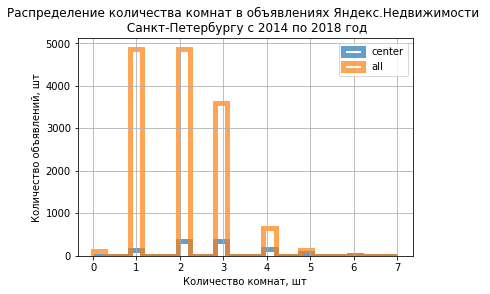

In [476]:
ax = spb_data_center.plot(kind='hist', y='rooms', histtype='step',range=(0, 7), bins=25, linewidth=5, alpha=0.7, label='center')
spb_data.plot(kind='hist', y='rooms', histtype='step', range=(0, 7), bins=25, linewidth=5, alpha=0.7, label='all', ax=ax, grid=True, legend=True,title = 'Распределение количества комнат в объявлениях Яндекс.Недвижимости \n Санкт-Петербургу с 2014 по 2018 год') 
ax.set_xlabel("Количество комнат, шт")
ax.set_ylabel("Количество объявлений, шт")

Если в общей выборке наибольшее число комнат - 1 или 2, то для центра это 2 или 3, значительную долю имеют 4-комнатные квартиры. 

Text(0, 0.5, 'Количество объявлений, шт')

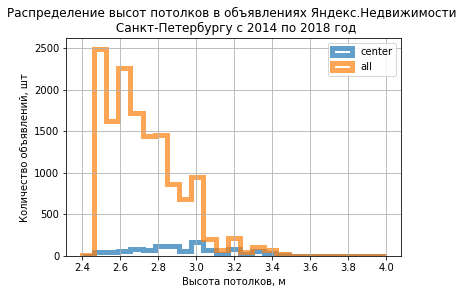

In [477]:
ax = spb_data_center.plot(kind='hist', y='ceiling_height', histtype='step',range=(2.4, 4), bins=25, linewidth=5, alpha=0.7, label='center')
spb_data.plot(kind='hist', y='ceiling_height', histtype='step', range=(2.4, 4), bins=25, linewidth=5, alpha=0.7, label='all', ax=ax, grid=True, legend=True,title = 'Распределение высот потолков в объявлениях Яндекс.Недвижимости \n Санкт-Петербургу с 2014 по 2018 год') 
ax.set_xlabel("Высота потолков, м")
ax.set_ylabel("Количество объявлений, шт")

При сравнении высоты потолков выборка смещается вправо, выделяются максимумы 3 и 3.2 м в правой части - скорее всего это "сталинки" с высокими потолками, которых должно быть много в центре.

### Шаг 5. Общий вывод<a name="paragraph4"></a>

В результате обработки и анализа предоставленных данных установлены основные зависмости. Время продажи большинства квартир не превышает 8 месяцев, очень маленькая часть квартир реализуется в теченее более 2х лет. Больше всего на стоимость квартиры влияют ее площадь, расстояние до центра и колтчество комнат. Если рассмотреть отдельно Санкт-Петербург, то стоимость квартир зависит от удаленности от центра. Если выделять центральый район в Петербурге, то такие квартиры, очевидно, будут дороже основного количества квартир. По общей площади эти квартиры не будут просторнее остальных, хотя количество комнат там будет больше и потолки выше, чем в большинстве квартир Петербурга.

Имея такие проанализированные данные из Яндкс.недвижимости возможно составить автоматизированную систему, которая будет рассчитывать рекомендованную цену недвижимости исходя из серии дома, этажа, расстояния до центра и населенного пункта, в котором продается квартира. Это позволит покупателям сориентироваться в реальной цене, не прибегая к сомнительным сравнениям. В каждом населенном пункте и округе будет своя специфика, которую должен учитывать специалист при построении данной системы.